<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector).
3. Split X and y into train and test subsets.
4. Preprocess your data:

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix.
   
5. Create your network:
   - Remember that for multi-class classification you need a softmax activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Train your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaining the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`.
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for **_at least_** two of the four **"configurations"**:

1. Using a `tensorflow` network
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

## Import 

In [5]:
# feedforward neural network

import pandas as pd
import numpy as np                 
import matplotlib.pyplot as plt    
from sklearn.model_selection import train_test_split

# Import Keras components
from tensorflow.keras.models import Sequential     
from tensorflow.keras.layers import Dense, Input,Dropout, Flatten, Conv2D, MaxPooling2D           
from tensorflow.keras import utils  

In [6]:
df_train = pd.read_csv('./digit-recognizer/train.csv')
df_test = pd.read_csv('./digit-recognizer/test.csv')

In [7]:
df_train.shape , df_test.shape

((42000, 785), (28000, 784))

In [8]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

In [11]:
# One-hot encode
X = df_train.drop('label', axis=1).to_numpy() 
y = df_train['label'].to_numpy()

In [12]:
print(X.min())
print(X.max())

0
255


In [13]:
# Normalize the pixel values  
X = X / 255.0

print(X.min())
print(X.max())

0.0
1.0


In [14]:
# Reshape each image to be 28 x 28 x 1
X = X.reshape(X.shape[0], 28, 28, 1)
X.shape

(42000, 28, 28, 1)

In [15]:
# Convert labels to one-hot encoded format
# Transform single digit (0-9) into binary vector of length 10
# e.g., 5 becomes [0,0,0,0,0,1,0,0,0,0]
y = utils.to_categorical(y, 10)
y[0:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modeling

In [39]:
# Create Sequential model

model = Sequential([
       Input(shape=(28, 28, 1)),    # Input shape: 28x28 grayscale images (1 channel)
       Flatten(), 
        Dense(128, activation='relu'),   
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
        ])

In [41]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [43]:
# Train the Model
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    verbose=1)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6392 - loss: 1.2022 - val_accuracy: 0.9217 - val_loss: 0.2756
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9298 - loss: 0.2407 - val_accuracy: 0.9421 - val_loss: 0.1970
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9513 - loss: 0.1666 - val_accuracy: 0.9499 - val_loss: 0.1694
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9591 - loss: 0.1349 - val_accuracy: 0.9565 - val_loss: 0.1418
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9702 - loss: 0.1020 - val_accuracy: 0.9584 - val_loss: 0.1319
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9741 - loss: 0.0869 - val_accuracy: 0.9645 - val_loss: 0.1166
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9808 - loss: 0.0661 - val_accuracy: 0.9677 - val_loss: 0.1103
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0592 - val_accuracy: 0.

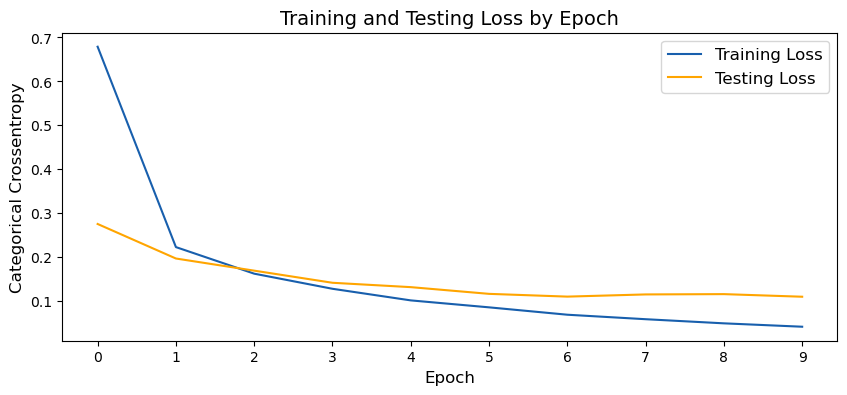

In [45]:
# Extract training and validation loss metrics from model history
train_loss = history.history['loss']          # Training loss per epoch
test_loss = history.history['val_loss']       # Validation loss per epoch
epoch_labels = history.epoch                  # List of epoch numbers

# Create visualization of loss over time
# Set figure dimensions (width=10, height=4)
plt.figure(figsize=(10, 4))                

# Plot loss curves
plt.plot(train_loss, label='Training Loss', color='#185fad')    # Blue line for training
plt.plot(test_loss, label='Testing Loss', color='orange')       # Orange line for testing

# Customize plot appearance
plt.title('Training and Testing Loss by Epoch', fontsize=14)    # Main title
plt.xlabel('Epoch', fontsize=12)                                # x-axis label
plt.ylabel('Categorical Crossentropy', fontsize=12)             # y-axis label (loss metric)
plt.xticks(epoch_labels, epoch_labels)                          # Set x-axis ticks to epoch numbers
plt.legend(fontsize=12);                                        # Add legend with labels

In [47]:
# Evaluate model performance on test data
# Returns loss and accuracy metrics

# The evaluate() method:
# - Tests model on unseen data
# - Computes both loss and metrics
# - Returns array: [loss_value, accuracy_value]

score = model.evaluate(X_test,
                       y_test, 
                       verbose=1)

# Get metric names (loss and accuracy)
labels = model.metrics_names

# Print results: loss value and accuracy percentage 
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9639 - loss: 0.1221
loss: 0.11009057611227036
compile_metrics: 0.9670634865760803


## Predictions

In [50]:
X_test = df_test.values

X_test = X_test / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) 

In [54]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


In [56]:
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(y_pred_classes) + 1),
    'Label': y_pred_classes
})

In [58]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [60]:
submission.to_csv('submission.csv', index=False)